In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from src.func_object import successive_over_relaxation_obj

SOR converged in 710 iterations


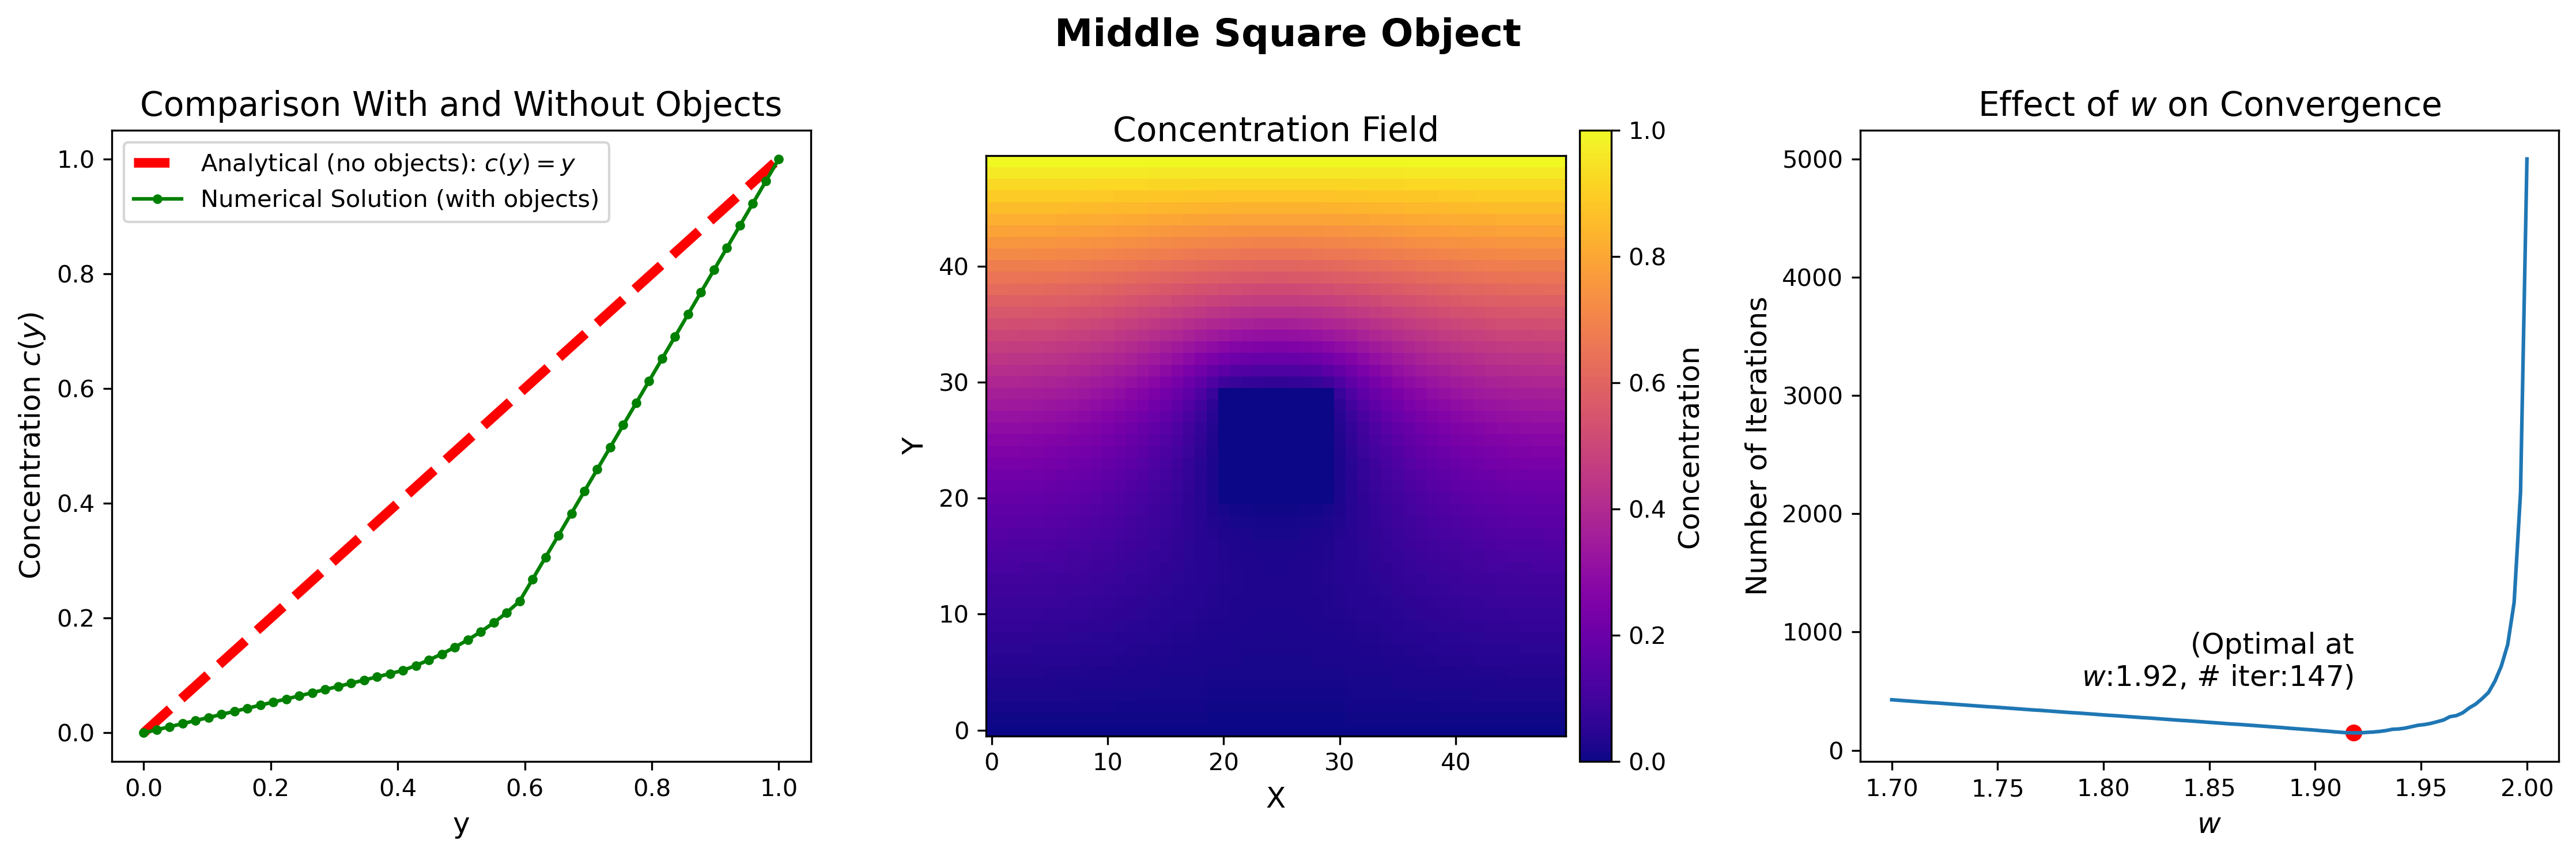

In [6]:
# Grid size and initialization
rows, cols = 50, 50
grid = np.zeros((rows, cols))
grid[rows-1, :] = 1.0  # Top boundary condition

# Define object mask
object_mask = np.zeros((rows, cols), dtype=int)
object_mask[20:30, 20:30] = 1  # A 10x10 rectangle as a sink

# Parameters
max_iters = 5000
w = 1.5
p = 6

# Solve using SOR
numerical_solution, counter = successive_over_relaxation_obj(grid, max_iters, w, p, object_mask)
numerical_profile = np.mean(numerical_solution, axis=1)
print(f"SOR converged in {counter} iterations")

# Create the figure and define grid layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
y_values = np.linspace(0, 1, 50)

# Add the first subplot (line plot)
axes[0].plot(y_values, y_values, label="Analytical (no objects): $c(y) = y$", linestyle="--", color="red", lw=4)
axes[0].plot(y_values, numerical_profile, label="Numerical Solution (with objects)", marker="o", markersize=3, linestyle="-", color="green")
axes[0].set_xlabel("y", fontsize=12)
axes[0].set_ylabel("Concentration $c(y)$", fontsize=12)
axes[0].legend(fontsize=10)
axes[0].set_title("Comparison With and Without Objects", fontsize=14)
axes[0].tick_params(axis='both', labelsize=10)

# Add the second subplot (heatmap)
im = axes[1].imshow(numerical_solution, cmap='plasma', origin='lower')
cbar = fig.colorbar(im, ax=axes[1], orientation='vertical', pad=0.02)
cbar.set_label("Concentration", fontsize=12)
axes[1].set_xlabel("X", fontsize=12)
axes[1].set_ylabel("Y", fontsize=12)
axes[1].set_title("Concentration Field", fontsize=14)
axes[1].tick_params(axis='both', labelsize=10)

# Plot the behavior for different w
w_values = np.linspace(1.7, 2.0, 100)
count_dic = {}
for w in w_values:
    numerical_solution, counter = successive_over_relaxation_obj(grid, max_iters, w, p, object_mask)
    count_dic[w] = counter
min_w = min(count_dic, key=count_dic.get)
min_counter = count_dic[min_w]
axes[2].plot(list(count_dic.keys()), list(count_dic.values()))
axes[2].scatter(min_w, min_counter, color="red")
axes[2].text(min_w, min_counter+400, f"(Optimal at\n$w$:{min_w:.2f}, # iter:{min_counter})", fontsize=12, ha='right')
axes[2].set_xlabel("$w$", fontsize=12)
axes[2].set_ylabel("Number of Iterations", fontsize=12)
axes[2].set_title("Effect of $w$ on Convergence", fontsize=14,)

# Add an overall title
fig.suptitle("Middle Square Object", fontsize=16, weight='bold')
fig.subplots_adjust(top=0.82)
fig.tight_layout()
# Save the figure
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, 'square_object.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


SOR converged in 476 iterations


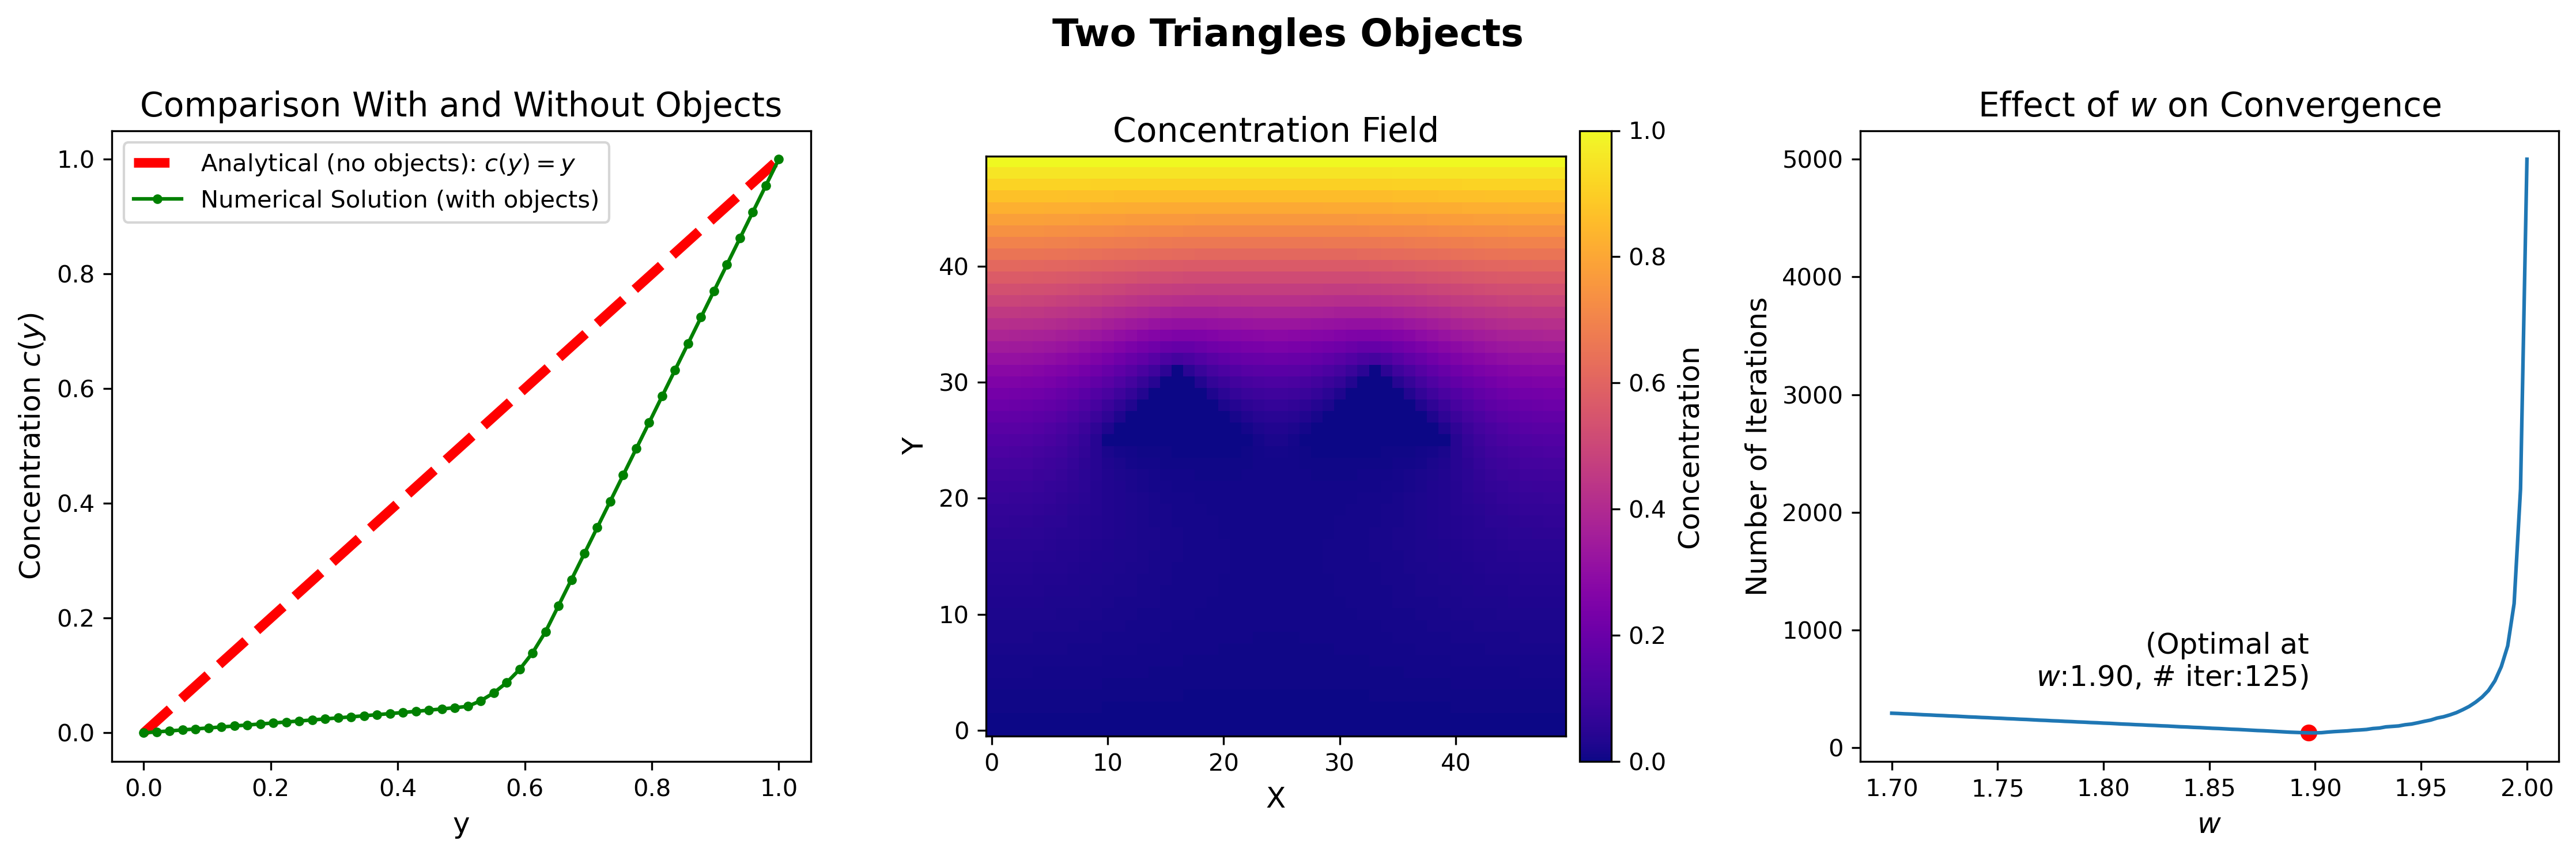

In [7]:
# Grid size and initialization
rows, cols = 50, 50
grid = np.zeros((rows, cols))
grid[rows-1, :] = 1.0  # Top boundary condition

# Define object mask
object_mask = np.zeros((rows, cols), dtype=int)

# Define the position for the triangles
center_y = rows // 2  # Middle of the y-axis
triangle_height = 7  # Height of the triangle

# Triangle 1 (downward-facing) at 1/3 of the x-axis
center_x_1 = cols // 3  # 1/3 of the x-axis
for i in range(center_y, center_y + triangle_height):  # Rows
    width = (center_y + triangle_height - i - 1)  # Decrease width as you go down
    for j in range(center_x_1 - width, center_x_1 + width + 1):  # Columns
        object_mask[i, j] = 1

# Triangle 2 (downward-facing) at 2/3 of the x-axis
center_x_2 = 2 * cols // 3  # 2/3 of the x-axis
for i in range(center_y, center_y + triangle_height):  # Rows
    width = (center_y + triangle_height - i - 1)  # Decrease width as you go down
    for j in range(center_x_2 - width, center_x_2 + width + 1):  # Columns
        object_mask[i, j] = 1


# Parameters
max_iters = 5000
w = 1.5
p = 6

# Solve using SOR
numerical_solution, counter = successive_over_relaxation_obj(grid, max_iters, w, p, object_mask)
numerical_profile = np.mean(numerical_solution, axis=1)
print(f"SOR converged in {counter} iterations")

# Create the figure and define grid layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
y_values = np.linspace(0, 1, 50)

# Add the first subplot (line plot)
axes[0].plot(y_values, y_values, label="Analytical (no objects): $c(y) = y$", linestyle="--", color="red", lw=4)
axes[0].plot(y_values, numerical_profile, label="Numerical Solution (with objects)", marker="o", markersize=3, linestyle="-", color="green")
axes[0].set_xlabel("y", fontsize=12)
axes[0].set_ylabel("Concentration $c(y)$", fontsize=12)
axes[0].legend(fontsize=10)
axes[0].set_title("Comparison With and Without Objects", fontsize=14)
axes[0].tick_params(axis='both', labelsize=10)

# Add the second subplot (heatmap)
im = axes[1].imshow(numerical_solution, cmap='plasma', origin='lower')
cbar = fig.colorbar(im, ax=axes[1], orientation='vertical', pad=0.02)
cbar.set_label("Concentration", fontsize=12)
axes[1].set_xlabel("X", fontsize=12)
axes[1].set_ylabel("Y", fontsize=12)
axes[1].set_title("Concentration Field", fontsize=14)
axes[1].tick_params(axis='both', labelsize=10)

# Plot the behavior for different w
w_values = np.linspace(1.7, 2.0, 100)
count_dic = {}
for w in w_values:
    numerical_solution, counter = successive_over_relaxation_obj(grid, max_iters, w, p, object_mask)
    count_dic[w] = counter
min_w = min(count_dic, key=count_dic.get)
min_counter = count_dic[min_w]
axes[2].plot(list(count_dic.keys()), list(count_dic.values()))
axes[2].scatter(min_w, min_counter, color="red")
axes[2].text(min_w, min_counter+400, f"(Optimal at\n$w$:{min_w:.2f}, # iter:{min_counter})", fontsize=12, ha='right')
axes[2].set_xlabel("$w$", fontsize=12)
axes[2].set_ylabel("Number of Iterations", fontsize=12)
axes[2].set_title("Effect of $w$ on Convergence", fontsize=14,)

# Add an overall title
fig.suptitle("Two Triangles Objects", fontsize=16, weight='bold')
fig.subplots_adjust(top=0.82)
fig.tight_layout()
# Save the figure
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, 'triangles_object.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


SOR converged in 455 iterations


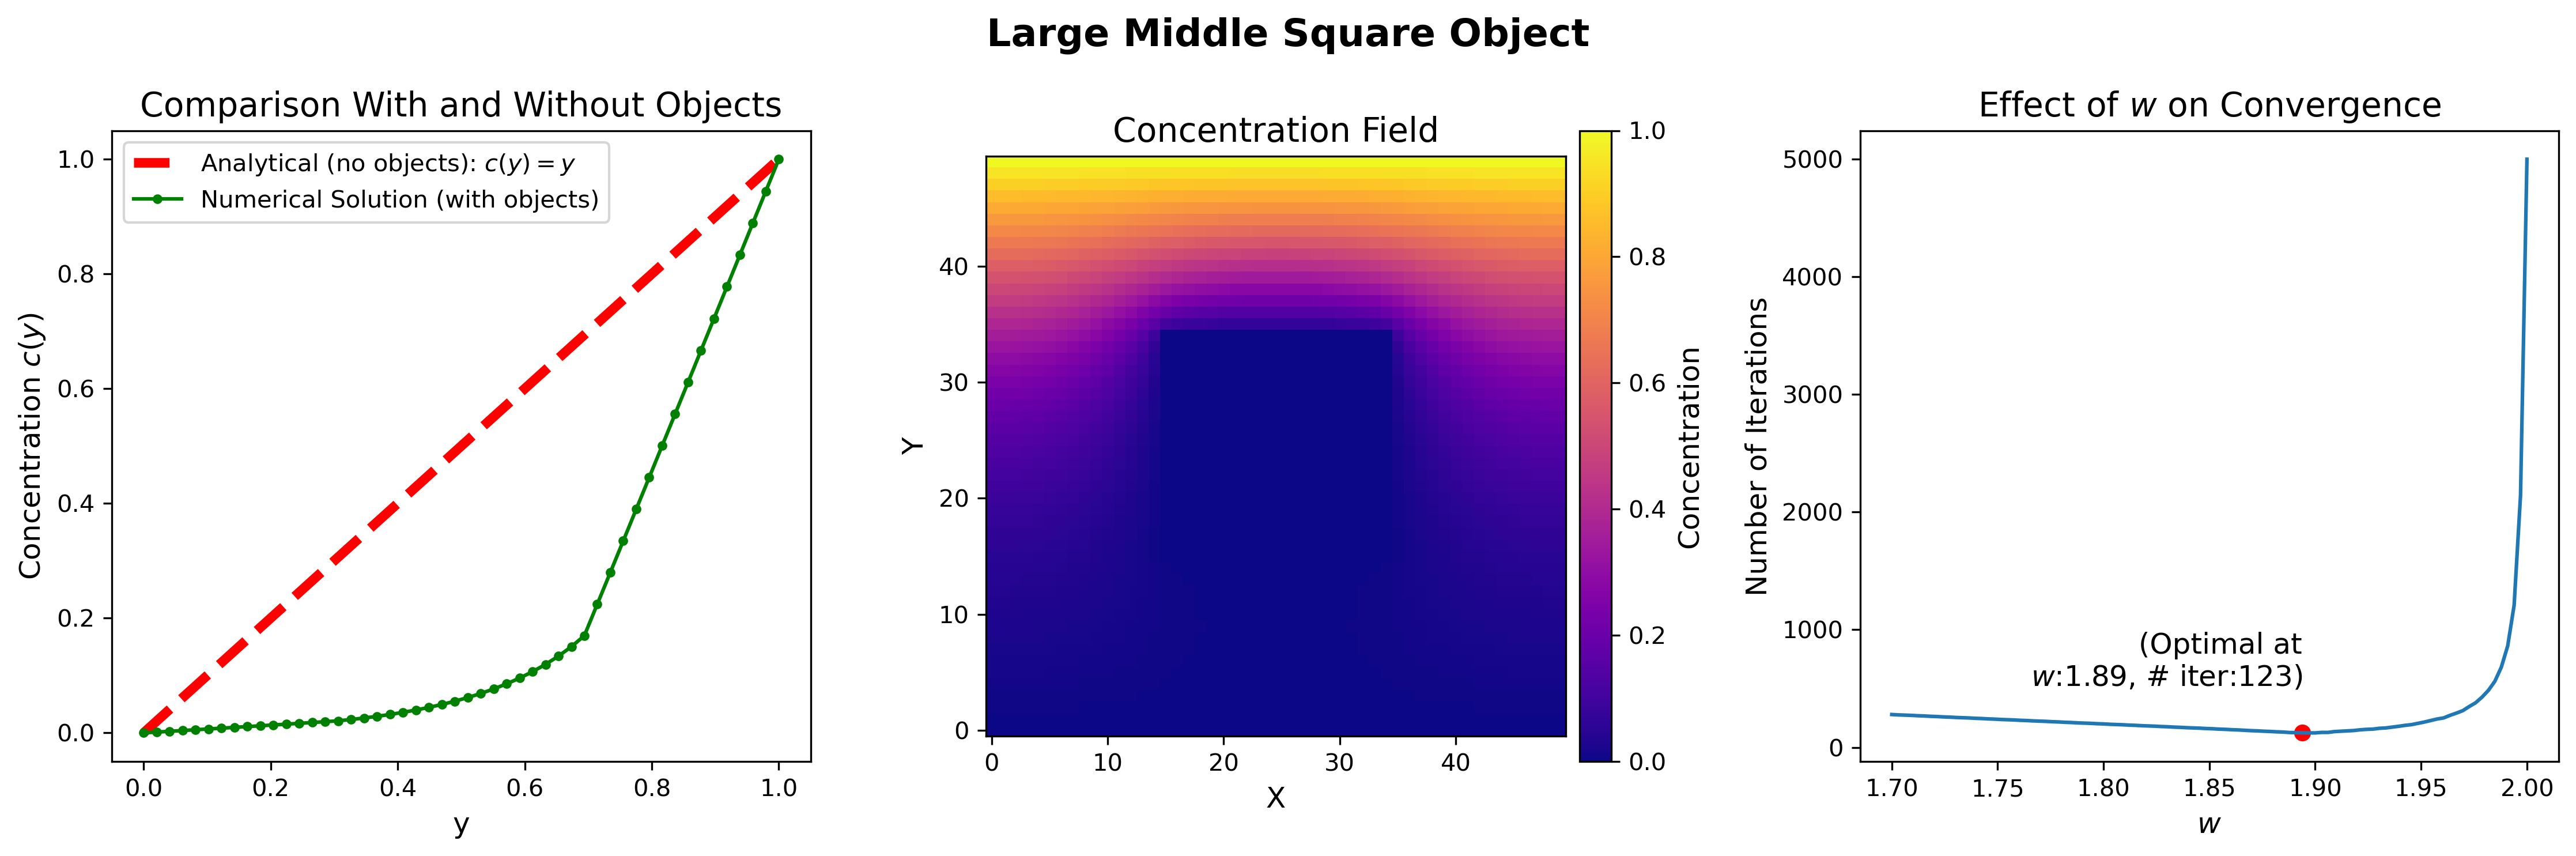

In [8]:
# Bigger Square to show how bigger objects require less iterations

# Grid size and initialization
rows, cols = 50, 50
grid = np.zeros((rows, cols))
grid[rows-1, :] = 1.0  # Top boundary condition

# Define object mask
object_mask = np.zeros((rows, cols), dtype=int)
object_mask[15:35, 15:35] = 1  # A 20x20 rectangle as a sink

# Parameters
max_iters = 5000
w = 1.5
p = 6

# Solve using SOR
numerical_solution, counter = successive_over_relaxation_obj(grid, max_iters, w, p, object_mask)
numerical_profile = np.mean(numerical_solution, axis=1)
print(f"SOR converged in {counter} iterations")

# Create the figure and define grid layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
y_values = np.linspace(0, 1, 50)

# Add the first subplot (line plot)
axes[0].plot(y_values, y_values, label="Analytical (no objects): $c(y) = y$", linestyle="--", color="red", lw=4)
axes[0].plot(y_values, numerical_profile, label="Numerical Solution (with objects)", marker="o", markersize=3, linestyle="-", color="green")
axes[0].set_xlabel("y", fontsize=12)
axes[0].set_ylabel("Concentration $c(y)$", fontsize=12)
axes[0].legend(fontsize=10)
axes[0].set_title("Comparison With and Without Objects", fontsize=14)
axes[0].tick_params(axis='both', labelsize=10)

# Add the second subplot (heatmap)
im = axes[1].imshow(numerical_solution, cmap='plasma', origin='lower')
cbar = fig.colorbar(im, ax=axes[1], orientation='vertical', pad=0.02)
cbar.set_label("Concentration", fontsize=12)
axes[1].set_xlabel("X", fontsize=12)
axes[1].set_ylabel("Y", fontsize=12)
axes[1].set_title("Concentration Field", fontsize=14)
axes[1].tick_params(axis='both', labelsize=10)

# Plot the behavior for different w
w_values = np.linspace(1.7, 2.0, 100)
count_dic = {}
for w in w_values:
    numerical_solution, counter = successive_over_relaxation_obj(grid, max_iters, w, p, object_mask)
    count_dic[w] = counter
min_w = min(count_dic, key=count_dic.get)
min_counter = count_dic[min_w]
axes[2].plot(list(count_dic.keys()), list(count_dic.values()))
axes[2].scatter(min_w, min_counter, color="red")
axes[2].text(min_w, min_counter+400, f"(Optimal at\n$w$:{min_w:.2f}, # iter:{min_counter})", fontsize=12, ha='right')
axes[2].set_xlabel("$w$", fontsize=12)
axes[2].set_ylabel("Number of Iterations", fontsize=12)
axes[2].set_title("Effect of $w$ on Convergence", fontsize=14,)

# Add an overall title
fig.suptitle("Large Middle Square Object", fontsize=16, weight='bold')
fig.subplots_adjust(top=0.82)
fig.tight_layout()
# Save the figure
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, 'large_square_object.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
